In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, binom
import networkx as nx
import time

## THEORY:

### Problem Statement

We consider $n$ interacting populations (species), for which dynamics are defined by a system of generalized __Lodka-Volterra equations__:

$$
\frac{\mathrm{d} X_i(t)}{\mathrm{d} t}=X_i(t)\left(r_i+\sum_j A_{i j} X_j(t)\right)
$$

where
- $X_i(t)$ is te abundance of population $i$ at time $t$
- $r_i$ is the intrinsic growth rate of species $i$
- $A_{ij}$ is the per-capita effect of species $j$ on the growth rate of species $i$ 
- $A$ is the interaction matrix that collects all $A_{ij}$ coefficients


A vector $\mathbf{x}^*$ is a fixed point (equilibrium) of the system if:
$$
0=x_i^{\star}\left(r_i+\sum_j A_{i j} x_j^{\star}\right) \quad \text { for } \quad i=1,2, \ldots, n
$$

$x_i^* = 0$ is always a possible solution, which implies that the system admits up to $2^n$ fixed points corresponding to all the combinations of presence and absence of each species.

A fixed point is __feasible__ if $x_i^*>0$ for all $i$.

If a feasible fixed point exists, it is the solution of 

$$ \mathbf{r} = - A \mathbf{x^*}$$

and, if $A$ is invertible, 

$$ \mathbf{x^*} = - A^{-1} \mathbf{r}$$


### Global stability and non-invasible fixed points

We will assume $A$ to be __negative definite__ and that, in particular, the matrix $A + A^T$ has only negative eigenvalues.

A matrix $A$ is __Lyapunov diagonally stable__ if there exists a positive diagonal matrix $D$ such that $DA + A^TD$ is negative definite. So, our assumption implies that $A$ is Lyapunov diagonally stable.

If $A$ is diagonally stable, then there exists a fixed point of the first equation that is __globally attractive__: irrespective of the initial conditions, dynamics always converge to the same fixed point.

This globally stable fixed point has 
- k positive entries
- n-k entries equal to 0

We then define 
- The __support__ $\{S\}_k$ as the set of $k$ persistent species (those for which at equilibrium $x_i^*>0$)
- $\{N\}_{n-k}=\{S\}_n/\{S\}_k$ as the set of $n-k$ species with $0$ abundance.

The $i$th entry of $\mathbf{x^*}$ is equal to 
- $0$ if $i\in \{N\}_{n-k}$
- $x_i>0$ if $i \in \{S\}_k$

We define:
- $A^{(s)}$ as the $k\times k$ submatrix of $A$ obtained by considering only rows and columns belonging to $\{S\}_k$
- $A^{(n)}$ as the $(n-k)\times (n-k)$ submatrix of $A$ obtained by considering rows and columns in $\{N\}_{n-k}$
- $A^{(sn)}$ as the $k\times (n-k)$ submatrix of $A$ obtained by considering rows in $\{S\}_k$ and columns in $\{N\}_{n-k}$
- $A^{(ns)}$ as the $(n-k)\times k$ submatrix of $A$ obtained by considering rows in $\{N\}_{n-k}$ and columns in $\{S\}_k$

The entries of the intrinsic growth rate vector can ve split into two subvectors:
- $\mathbf{r}^{(s)}$ which is a $k$-dimensional (column) vector with entries corresponding to $\mathbf{r}$'s entries for $\{S\}_k$
- $\mathbf{r}^{(s)}$ which is a $(n-k)$-dimensional (column) vector with entries corresponding to $\{N\}_{n-k}$

Rearranging the indices of the vecotrs such that the $k$ persistent species occupy the first $k$ entries,
- the globally stable fixed point $\mathbf{x^*}$ can be written as
$
\mathbf{x^*} =
\left(\begin{array}{c}
\mathbf{x} \\
\mathbf{0}_{n-k}
\end{array}\right)
$
- the intrinsic growth vector becomes 
$
\mathbf{r}=
\left(\begin{array}{c}
\mathbf{r}^{(s)} \\
\mathbf{r}^{(n)}
\end{array}\right)
$
- the interaction matrix reads
$
A=\left(\begin{array}{c|c}
A^{(s)} & A^{(s n)} \\
\hline A^{(n s)} & A^{(n)}
\end{array}\right)
$

Then, the abundance of the $k$ persistent species is a solution of $A^{(s)}\mathbf{x}=-\mathbf{r}^{(s)}$.

Since we are dealing with only diagonally stable matrices, the equilibrium point is __not invasible__ by any of the remaining $n-k$ species. This condition can be written by imposing negative growth rate for the $n-k$ species in the limit of small densities:
$$ \mathbf{r}^{(n)}+A^{(ns)}\mathbf{x}<0$$.


In the case of diagonally stable matrices, the combination of $\{S\}_k$ and $\mathbf{x}$ is unique, the only one for which the solution $\mathbf{x}$ has positive components and such that this last equation holds.

### Distribution of the non-invasible fixed points

Since $A$ is diagonally stable, __the number of coexisting species $k$ is fully and uniquely determined by the vector of intrinsic growth rates $\mathbf{r}$__. In fact, only the direction of $\mathbf{r}$ and not its norm determines coexistence.

__GOAL__: determine $P(k|n)$, the probability of observing $k$ coexisting species out of $n$, given a distribution for entries of the matrix $A$ and a distribution for the intrinsic growth rates $\mathbf{r}$.

We parametrize the entries of $A$ as the sum of a deterministic and a random matrix $B$ (whose entries are random variables with mean 0):

$$A_{ij}=(\alpha - \mu)\delta_{ij}+\mu+B_{ij}$$

(Diagonal terms $A_{ii}$ have mean $\alpha$ and off-diagonal terms have mean $\mu$).

Similarly, being the entries of vector $\mathbf{b}$ randm varaibles with 0-mean:

$$r_i = \gamma + b_i$$

Let us define $\mathcal{P}(\{S\}_k|A)$ as the probability that the support of the globally stable fixed point is $\{S\}_k$ (calculated over the growth rate vectors $\mathbf{r}$).

If we average the previous quantity over the distribution of $A$ we obtain

$$\mathcal{P}(\{S\}_k|n):=\mathbb{E}(\mathcal{P}(\{S\}_k|A))$$

And the probability that the support has cardinality $k$ is 

$$ P(k|n):=\sum_{\{S\}_k} \mathcal{P}(\{S\}_k|n) $$

## RESULTS:

#### 1. Analyse the case closest to May's contribution: caricature of a food web (some species can grow in isolation, others only as a result of their interactions; but all of them establish interactions with each other).

##### a) Symmetric mean-0 distributions are used to sample growth rates and inter-specific interactions 
_Positive effects (contribution of preys to growth of predators) on average counterbalance negative ones (effects of predators on preys).__

 We sample the intrinsic growth (death) rates $r_i$ and the inter-specific interations $A_{ij}$ from symmetric distributions around 0. And intra-specific interactions as a sum of a mean zero symmetric random variable and a constant $d_i$. This leads us to half of the species growing in isolation and the rest relying in consumption for their survival.

1. The first result is on the feasibility of equilibria:
        
      Under the previous conditions, the probability that a system of $n$ species has a (completely) positive equilibrium point is $1/2^n$ (irrespective of the choice of $d_i$ and the exact shapes of the distributions).
      
      __Feasibility is necessary but not sufficient for coexistance.__
      
2. To study coexistence we must make the followig stronger assumption: matrix $A+A^T$ must be negative definite; which can be achieved by choosing suitable large and negative $d_i$.
     
Under both conditions, a GLV model has a single globally attractive equilibrium, the __non invasible solution__: $k$ species have positive density at equilibrium while $(n-k)$ species cannot invade this community and will go extinct irrespective of the initial conditions.
    
Surprise! When __sampling parameters at random__, the non-invasibility and feasibility conditions for each subset of species balance out: __each species has probability $1/2$ of being included in the non-invasible solution__. So, __$P(k|n)$__ (probability of finding $k$ species coexisting when we start with $n$) __follows a binomial distribution $B(n,1/2)$__.

This means that if we start with a strongly stable ($A+A^T$ negative definite) random matrix of interactions and random growth rates, about half of the species would coexist irrespective of the choice of $n$. This is exatly what we would expect if species were not to interact at all ($A_{ii}=d_i<0$ and $A_{ij}=0$).

Allesina and Tang showed how __stability is strongly influenced by the correlation between the inter-specific interactions__. For instance, stability is enhaced if when sampling interactions in pairs ($A_{ij}, A_{ji}$), we do it choosing a negative correlation. However, when analysing __coexistence__, this break of independence has __no effect__.

Another analysis: what is the effect of network structure? None, even if network structure strongly affects stability.

##### b) Symmetric NON-0-mean distributions are used to sample growth rates and inter-specific interactions 

Simple model of interacting competitors: 
- set all __inter and intra-specific interactions__ to be __negative__, that is, we have competitive interactions: $A_{ij}=\mu<0$ and $A_{ii}=d_i=\alpha<0$
- consider __random growth rates__; we assume all species in the pool are sampled from a common habitat and thus, our growth rates have a well defined average value. We decide to sample them from a __normal distribution with mean $\gamma$__.

Again, consider matrices with $\alpha$ strong enough to yield Lyapunov diagonal stability ($\alpha<\mu<0$).

Since growth rates need to be positive for species to survive, we consider the case of $\gamma\geq 0 $.

RESULTS: nonzero mean $\gamma$ in growth rates can yield a larger or smaller number of coexisting species compared to mean zero case. Distribution $P(k|n)$ is not binomial anymore but still retains a strong central tendency.

When using network structure (and comparing), the results are similar to the mean-zero case but not all network structures yield the same exact distribution (being the effect very modest).

$log_2(\alpha/\hat\mu)$

## Zero-Mean Case

In [2]:
#####
# Interaction matrix
#####

def A_ZeroMean(n, alpha, graph_adj, rho):
    #A is negative definite (A+A^T) has only got negative eigenvalues
    sd = 1
    d = alpha*np.ones(n)
    if rho==0:
        A = np.random.normal(0, sd, (n,n))
        A = A*graph_adj
        np.fill_diagonal(A, d)
    else:
        Sigma = np.array(((sd**2, rho * sd**2), (rho * sd**2, sd**2)))
        A = np.zeros((n,n))
        for i in range(n-1):
            for j in range(i+1, n):
                distr = multivariate_normal.rvs(mean=(0,0), cov=Sigma, size = 1)
                A[i,j] = distr[0]
                A[j,i] = distr[1]
        A = A*graph_adj
        np.fill_diagonal(A, d)
    return (A)


In [3]:
#####
# Intrinsic growth rates vector
#####

def r_ZeroMean(n):
    r = np.random.normal(0,1,(n))
    return(r)

In [4]:
#####
# Feasible fixed point
#####

def x_fp(A, r):
    A_inv = np.linalg.inv(A)
    x_sol = -np.matmul(A_inv,r)
    return(x_sol)

In [5]:
def k_sim(n, alpha, graph_adj, rho, t=2*10**5):  
    k = np.zeros(t)
    for i in range(t):
        A = A_ZeroMean(n, alpha, graph_adj, rho)
        r = r_ZeroMean(n)
        x_sol = x_fp(A,r)    
        k[i] = np.sum(x_sol>0)
    return(k)

In [6]:
def k_eq_sim_0(n, alpha, graph_adj, rho, t):  
    
    k = np.zeros(t)
    for i in range(t):
        A = A_ZeroMean(n, alpha, graph_adj, rho)
        r = r_ZeroMean(n)
        x = x_fp(A,r)
        neg = np.where(x<0)
        while neg[0].shape[0]!=0:

            A = np.delete(A, neg, 0)
            A = np.delete(A, neg, 1)
            r = np.delete(r, neg)
            x = x_fp(A,r)
            neg = np.where(x<0)

        k_ = x.shape[0]
        k[i] = k_
    
    return(k)

In [7]:
def k_n(N, alpha, graph, rho, t=2*10**5):
    
    k_n = np.zeros((3, t))
    
    if graph=='complete':
        for i in range(3):
            n = N[i]
            complete = np.ones((n,n))
            k_n[i] = k_eq_sim_0(n, alpha, complete, rho, t)
            
    elif graph=='ERG':
        for i in range(3):
            n = N[i]
            ERG_adj = nx.to_numpy_array(nx.erdos_renyi_graph(n, 0.5))
            k_n[i] = k_eq_sim_0(n, alpha, ERG_adj, rho, t)
            
    elif graph=='BAG':
        for i in range(3):
            n = N[i]
            BAG_adj = nx.to_numpy_array(nx.barabasi_albert_graph(n, 2))
            k_n[i] = k_eq_sim_0(n, alpha, BAG_adj, rho, t)
            
    return(k_n)

6861.026354074478


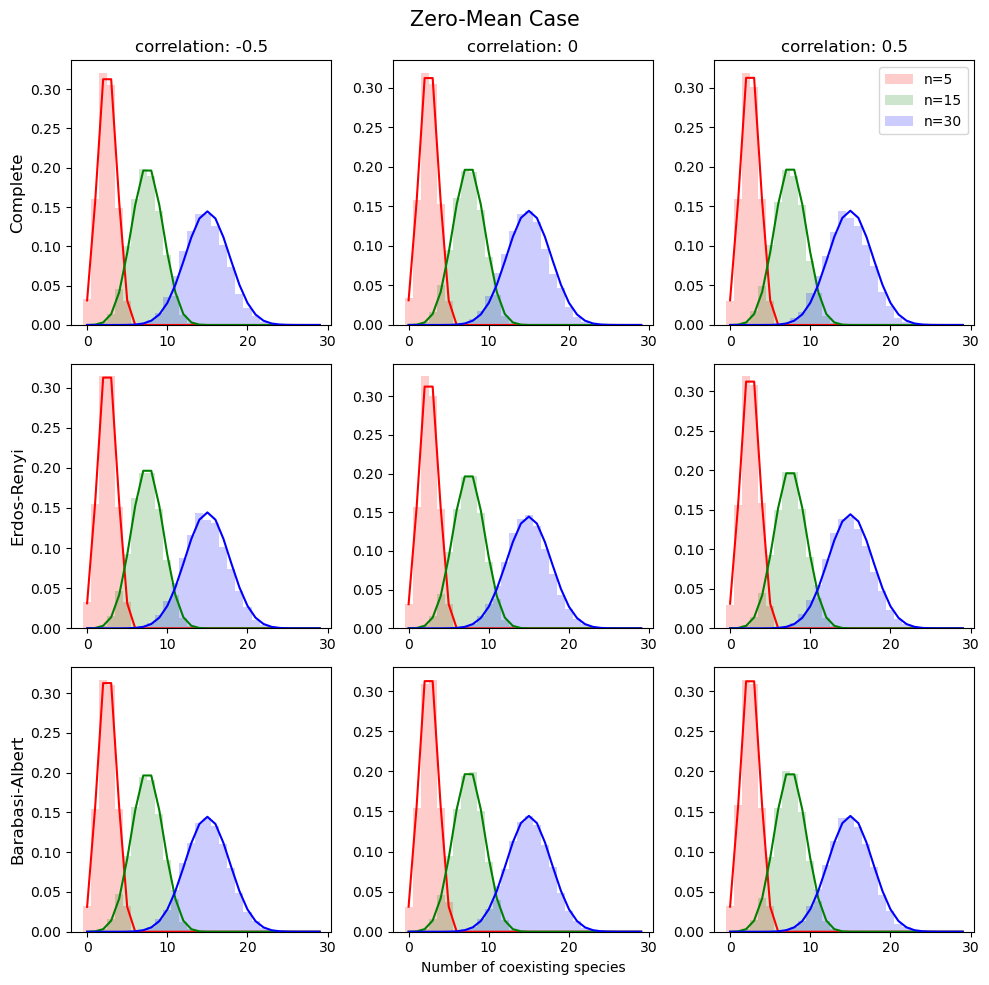

In [8]:
start = time.time()

t = (10**4)

N = [5, 15, 30]
graph = ['complete', 'ERG', 'BAG']
rho = [-0.5, 0, 0.5]
alpha = -50
fig, axs = plt.subplots(3, 3, figsize=(10,10))

for i in range(3):
    graph_i = graph[i]
    
    for j in range(3):
        rho_j = rho[j]
        
        kn = k_n(N, alpha, graph_i, rho_j, t)
        
        axs[i, j].hist(kn[0], bins = np.arange(0,30,1), density=True, alpha = 0.2, lw=3, color= 'r', align='left', label = 'n=5')
        axs[i, j].plot(np.arange(0,30,1), binom.pmf(np.arange(0,30,1), N[0], 0.5), color = 'r')
        axs[i, j].hist(kn[1], bins = np.arange(0,30,1), density=True, alpha = 0.2, lw=3, color= 'g', align='left', label = 'n=15')
        axs[i, j].plot(np.arange(0,30,1), binom.pmf(np.arange(0,30,1), N[1], 0.5), color = 'g')
        axs[i, j].hist(kn[2], bins = np.arange(0,30,1), density=True, alpha = 0.2, lw=3, color= 'b', align='left', label = 'n=30')
        axs[i, j].plot(np.arange(0,30,1), binom.pmf(np.arange(0,30,1), N[2], 0.5), color = 'b')
        
axs[2, 1].set_xlabel('Number of coexisting species')
axs[1, 0].set_ylabel('Frequency')
axs[0, 2].legend(loc='upper right')
        
cols = ['correlation: {}'.format(col) for col in rho]
rows = ['{}'.format(row) for row in ['Complete', 'Erdos-Renyi', 'Barabasi-Albert']]

for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')
    
fig.suptitle('Zero-Mean Case', fontsize=15)
    
fig.tight_layout()        

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
 #   ax.label_outer()
end = time.time()
print(end - start)

## Non-Zero-Mean Case

In [51]:
def A_NonZeroMean(n, alpha, mu):
    #A is negative definite (A+A^T) has only got negative eigenvalues
    d = alpha*np.ones(n)
    A = mu*np.ones((n,n))
    np.fill_diagonal(A, d)
    return (A)

In [52]:
def r_NonZeroMean(n, gamma):
    r = np.random.normal(gamma,1,(n))
    return(r)

In [53]:
def x_fp(A, r):
    A_inv = np.linalg.inv(A)
    x_sol = -np.matmul(A_inv,r)
    return(x_sol)

In [35]:
def k_sim(n, alpha, mu, gamma, t=10**3):  
    k = np.zeros(t)
    for i in range(t):
        A = A_NonZeroMean(n, alpha, mu)
        r = r_NonZeroMean(n, gamma)
        x_sol = x_fp(A,r)    
        k[i] = np.sum(x_sol>0)
    return(k)

In [36]:
def k_eq_sim(n, alpha, mu, gamma, t):  
    
    k = np.zeros(t)
    for i in range(t):
        A = A_NonZeroMean(n, alpha, mu)
        r = r_NonZeroMean(n, gamma)
        x = x_fp(A,r)
        neg = np.where(x<0)
        while neg[0].shape[0]!=0:

            A = np.delete(A, neg, 0)
            A = np.delete(A, neg, 1)
            r = np.delete(r, neg)
            x = x_fp(A,r)
            neg = np.where(x<0)

        k_ = x.shape[0]
        k[i] = k_
    
    return(k)

In [37]:
def k_n_non0(N, alpha, mu, gamma, t=2*10**5):
    
    k_n = np.zeros((3, t))

    for i in range(3):
        n = N[i]
        k_n[i] = k_eq_sim(n, alpha, mu/n, gamma, t)           
            
    return(k_n)

In [24]:
def k_mean(n, alpha, t):

    range_mix = np.arange(-5,3,0.1)
    mu = alpha/n/2**(range_mix)
    gamma = np.arange(0,3,0.02)

    k_mean = np.zeros((gamma.shape[0], mu.shape[0]))
    for i in range(gamma.shape[0]):
        gamma_i = gamma[i]
        for j in range(mu.shape[0]):
            mu_j = mu[j]
            k_mean[i,j] = np.mean(k_eq_sim(n, alpha, mu_j, gamma_i, t)/n)
    return(k_mean)

In [25]:
k_mean_ = k_mean(100, -200, 100)

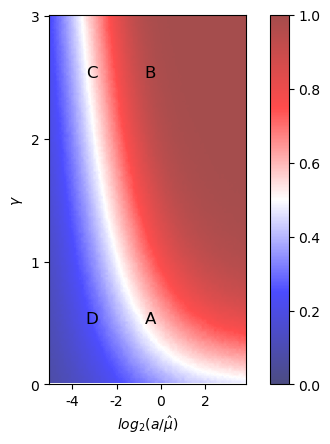

In [30]:
n=100
alpha = -200
range_mix = np.arange(-5,3,0.1)
mu = alpha/n/2**(range_mix)
gamma = np.arange(0,3,0.02)


fig, ax = plt.subplots() 
  
im = ax.imshow((np.flipud(k_mean_)), vmin=0, vmax=1, cmap='seismic', alpha=0.7)
ax.set_xticks(np.array((1,3,5,7))*(1+int(range_mix.shape[0]/9)), [-4, -2, 0, 2])
ax.set_yticks([0,50,100,150], [3, 2, 1, 0])
plt.colorbar(im) 
ax.set_xlabel('$log_2(a/\hat\mu)$')
ax.set_ylabel('$\gamma$')
plt.text(4.8*int(range_mix.shape[0]/9), 2.5*150/3, 'A', fontsize = 12)
plt.text(4.8*int(range_mix.shape[0]/9), 0.5*150/3, 'B', fontsize = 12)
plt.text(1.8*int(range_mix.shape[0]/9), 0.5*150/3, 'C', fontsize = 12)
plt.text(1.8*int(range_mix.shape[0]/9), 2.5*150/3, 'D', fontsize = 12)

plt.show() 

206.13262152671814


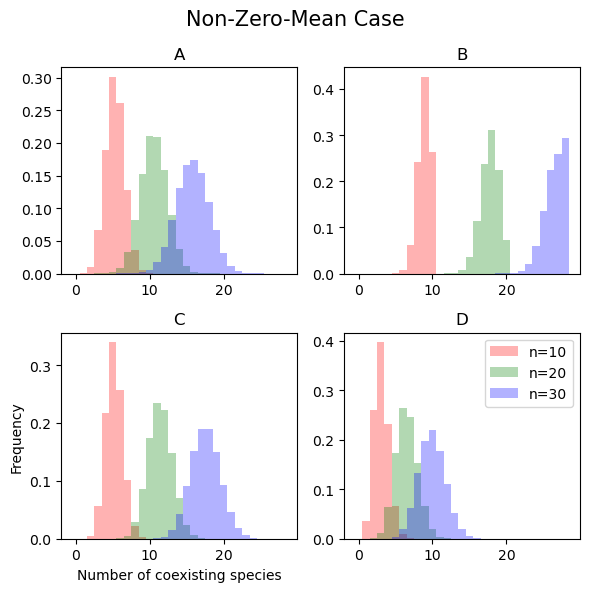

In [38]:
start = time.time()

t = (10**5)

N = [10, 20, 30]
alpha = -50
mu_vals = [alpha, alpha, alpha/(2**(-2)), alpha/(2**(-2))]
gamma_vals = [0.5, 2.5, 2.5, 0.5]

fig, axs = plt.subplots(2, 2, figsize=(6,6))

kn_A = k_n_non0(N, alpha, mu_vals[0], gamma_vals[0], t)
kn_B = k_n_non0(N, alpha, mu_vals[1], gamma_vals[1], t)
kn_C = k_n_non0(N, alpha, mu_vals[2], gamma_vals[2], t)
kn_D = k_n_non0(N, alpha, mu_vals[3], gamma_vals[3], t)


axs[0, 0].hist(kn_A[0], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'r', align='left', label = 'n=10')
axs[0, 0].hist(kn_A[1], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'g', align='left', label = 'n=20')
axs[0, 0].hist(kn_A[2], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'b', align='left', label = 'n=30')
axs[0, 0].title.set_text('A')

axs[0, 1].hist(kn_B[0], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'r', align='left', label = 'n=10')
axs[0, 1].hist(kn_B[1], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'g', align='left', label = 'n=20')
axs[0, 1].hist(kn_B[2], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'b', align='left', label = 'n=30')
axs[0, 1].title.set_text('B')

axs[1, 0].hist(kn_C[0], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'r', align='left', label = 'n=10')
axs[1, 0].hist(kn_C[1], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'g', align='left', label = 'n=20')
axs[1, 0].hist(kn_C[2], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'b', align='left', label = 'n=30')
axs[1, 0].title.set_text('C')

axs[1, 1].hist(kn_D[0], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'r', align='left', label = 'n=10')
axs[1, 1].hist(kn_D[1], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'g', align='left', label = 'n=20')
axs[1, 1].hist(kn_D[2], bins = np.arange(0,30,1), density=True, alpha = 0.3, lw=3, color= 'b', align='left', label = 'n=30')
axs[1, 1].title.set_text('D')

axs[1, 0].set_xlabel('Number of coexisting species')
axs[1, 0].set_ylabel('Frequency')
axs[1, 1].legend(loc='upper right')
        

fig.suptitle('Non-Zero-Mean Case', fontsize=15)
    
fig.tight_layout()        

end = time.time()
print(end - start)

## Analysis of Real Food Web

In [147]:
import pandas as pd

In [266]:
file = 'FW_005.csv'
A_pd = pd.read_csv(file, header=None)

In [267]:
def A_r_mu(A_pd, alpha, gamma):
    #interaction matrix
    A = A_pd.to_numpy()
    n = A.shape[0]
    diag = np.zeros((n,n))
    np.fill_diagonal(diag, alpha)
    A = A + diag

    A_mu = np.copy(A)
    np.fill_diagonal(A_mu, 0)
    mu = np.sum(A_mu)/(n*(n-1))

    #intrinsic growth rates
    r = r_NonZeroMean(A.shape[0], gamma)
    
    return(A, r, mu)

In [268]:
def k_real(A, r):  
    x = x_fp(A,r)
    neg = np.where(x<0)
    while neg[0].shape[0]!=0:

        A = np.delete(A, neg, 0)
        A = np.delete(A, neg, 1)
        r = np.delete(r, neg)
        x = x_fp(A,r)
        neg = np.where(x<0)

    k = x.shape[0]
    
    return(k)

In [269]:
data = A_r_mu(A_pd, -50,0)
k_real(data[0], data[1])

21

In [234]:
range_mu_alpha = np.arange(-6,8,0.05)
alpha = mu*n*2**(range_mu_alpha)
gamma = np.arange(-3, 1, 0.01)

In [235]:

k = np.zeros((gamma.shape[0], alpha.shape[0]))

for i in range(gamma.shape[0]):
    gamma_i = gamma[i]
    
    for j in range(alpha.shape[0]):
        alpha_j = alpha[j]
        
        data = A_r_mu(A_pd, alpha_j, gamma_i)
        
        k[i,j] = k_real(data[0], data[1])/n


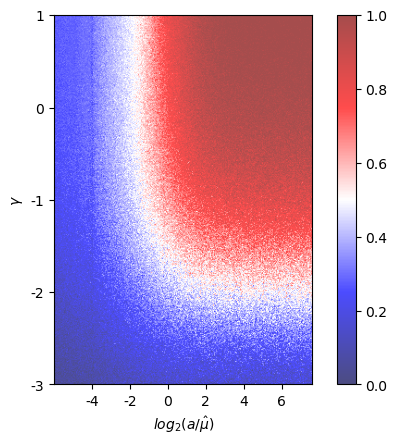

In [245]:
n = 44
mu = data[2]

fig, ax = plt.subplots() 
  
im = ax.imshow((k), vmin=0, vmax=1, cmap='seismic', alpha=0.7)
ax.set_xticks(np.array((1,2,3,4,5,6))*(1+int(range_mu_alpha.shape[0]/7)), [-4, -2, 0, 2, 4, 6])
ax.set_yticks([0,100,200,300, 400], [1, 0, -1, -2, -3])
plt.colorbar(im) 
ax.set_xlabel('$log_2(a/\hat\mu)$')
ax.set_ylabel('$\gamma$')

plt.show() 